In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
data = pd.read_csv('project_data_user_count_30.csv',header=0)
data=data.dropna()

#data columns
data=data.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data=data.drop("genres", axis=1)
data.loc[data['average_user_rating']>=3.5, 'average_user_rating']=1
data.loc[data['average_user_rating']!=1, 'average_user_rating']=0

data_X=data.drop('average_user_rating',axis=1)
data_y=data.loc[:,data.columns=='average_user_rating']


data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']]=StandardScaler().fit_transform(data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']])

os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(data_X, data_y, test_size=0.3, random_state=0)
columns=X_train.columns

X_train,y_train=os.fit_sample(X_train, y_train.to_numpy().ravel())
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train= pd.DataFrame(data=y_train,columns=['average_user_rating'])

y_train.average_user_rating.value_counts()
X_train.head()

,user_rating_count,price,age_rating,language_en,language_sum,size,release_date,last_update,supported_devices,in_app_purchase
0,-0.157709,0.99,-0.851485,1,-0.561283,-0.479634,0.339021,-0.041101,0.099720,0
1,-0.151718,0.00,0.437470,1,-0.561283,0.228798,-0.249278,-0.327711,0.099720,0
2,-0.166011,0.00,-0.851485,1,-0.561283,-0.577119,0.122751,0.005774,0.099720,1
3,-0.156473,0.00,-0.851485,1,-0.561283,-0.572604,-0.410640,0.779888,0.859935,1
4,-0.166960,7.99,1.210842,1,-0.561283,5.092260,-0.688541,-0.083959,0.099720,0


In [6]:
clf=RandomForestClassifier(n_estimators=100)

clf = clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix_RF_binary = confusion_matrix(y_test,y_pred)
print(confusion_matrix_RF_binary)

/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.23      0.26      0.24       109
           1       0.95      0.94      0.95      1679

    accuracy                           0.90      1788
   macro avg       0.59      0.60      0.60      1788
weighted avg       0.91      0.90      0.91      1788

[[  28   81]
 [  93 1586]]


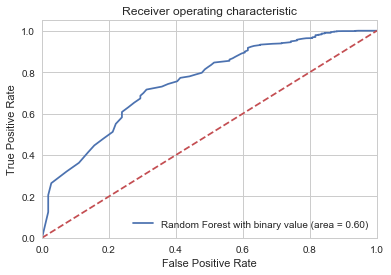

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest with binary value (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

In [8]:
data = pd.read_csv('./project_data_user_count_30.csv',header=0)
data=data.dropna()

#data columns
data=data.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data=data.drop("genres", axis=1)


data_X=data.drop('average_user_rating',axis=1)
data_y=data.loc[:,data.columns=='average_user_rating']


data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']]=StandardScaler().fit_transform(data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']])

os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(data_X, data_y, test_size=0.3, random_state=0)
columns=X_train.columns

X_train,y_train=os.fit_sample(X_train, y_train.to_numpy().ravel())
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train= pd.DataFrame(data=y_train,columns=['average_user_rating'])

y_train.average_user_rating.value_counts()
# X_train.head()

5    2508
4    2508
3    2508
2    2508
Name: average_user_rating, dtype: int64

In [9]:
clf=RandomForestClassifier(n_estimators=100)

clf = clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix_RF_multi = confusion_matrix(y_test,y_pred)
print(confusion_matrix_RF_multi)

/Users/zhaoqingteng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           2       0.00      0.00      0.00        11
           3       0.20      0.27      0.23        98
           4       0.52      0.52      0.52       621
           5       0.74      0.70      0.72      1058

    accuracy                           0.61      1788
   macro avg       0.36      0.37      0.37      1788
weighted avg       0.63      0.61      0.62      1788

[[  0   1   5   5]
 [  2  26  46  24]
 [ 13  50 326 232]
 [  9  53 253 743]]
